In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)

# Load Data

In [2]:
life_exp_df = pd.read_csv('life_expectancy.csv')
nr_of_births_df = pd.read_csv('number_of_births.csv')
pop_by_country_df = pd.read_csv('population_by_country.csv')
children_per_woman_df = pd.read_csv('children_per_woman.csv')
countries_continents = pd.read_csv('countries_continents.csv')

life_exp_df.head()

,Entity,Code,Year,life_expectancy
0,Afghanistan,AFG,1960,32.45
1,Afghanistan,AFG,1961,32.96
2,Afghanistan,AFG,1962,33.47
3,Afghanistan,AFG,1963,33.97
4,Afghanistan,AFG,1964,34.46


In [3]:
nr_of_births_df.head()

,Entity,Code,Year,births
0,Afghanistan,AFG,1950,"390,647.00"
1,Afghanistan,AFG,1951,"393,556.00"
2,Afghanistan,AFG,1952,"399,578.00"
3,Afghanistan,AFG,1953,"406,005.00"
4,Afghanistan,AFG,1954,"412,837.00"


In [4]:
pop_by_country_df.head()

,Rank,Entity,pop2022,pop2021,GrowthRate,area,Density
0,1,China,"1,448,471.40","1,444,216.11",1.00,9706961,149.22
1,2,India,"1,406,631.78","1,393,409.04",1.01,3287590,427.86
2,3,United States,"334,805.27","332,915.07",1.01,9372610,35.72
3,4,Indonesia,"279,134.51","276,361.78",1.01,1904569,146.56
4,5,Pakistan,"229,488.99","225,199.94",1.02,881912,260.22


In [5]:
children_per_woman_df.head()

,Entity,Code,Year,births_per_woman,population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1950,7.45,"7,752,117.00",NaN
2,Afghanistan,AFG,1951,7.45,"7,840,151.00",NaN
3,Afghanistan,AFG,1952,7.45,"7,935,996.00",NaN
4,Afghanistan,AFG,1953,7.45,"8,039,684.00",NaN


In [6]:
countries_continents.head()

,Continent,Country,Unnamed: 2
0,Africa,Algeria,NaN
1,Africa,Angola,NaN
2,Africa,Benin,NaN
3,Africa,Botswana,NaN
4,Africa,Burkina,NaN


# Look for which countries data is available

In [7]:
countries_exp = life_exp_df['Entity'].unique()
countries_exp

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean Small States', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
      

In [8]:
countries_births = nr_of_births_df['Entity'].unique()
countries_births

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia, Central', 'Australia', 'Australia & New Zealand', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Central African Republic',
       'Central America', 'Central and Southern Asia', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Eastern and South-Eastern Asia',
       'Ecuador', 'Egypt', 'El Sa

In [9]:
countries_pop = pop_by_country_df['Entity'].unique()
countries_pop

array(['China', 'India', 'United States', 'Indonesia', 'Pakistan',
       'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Japan',
       'Ethiopia', 'Philippines', 'Egypt', 'Vietnam', 'DR Congo', 'Iran',
       'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'France',
       'Tanzania', 'South Africa', 'Italy', 'England', 'Kenya', 'Myanmar',
       'Colombia', 'South Korea', 'Uganda', 'Spain', 'Argentina', 'Sudan',
       'Algeria', 'Ukraine', 'Iraq', 'Afghanistan', 'Canada', 'Morocco',
       'Poland', 'Saudi Arabia', 'Angola', 'Uzbekistan', 'Peru',
       'Malaysia', 'Mozambique', 'Ghana', 'Yemen', 'Nepal', 'Venezuela',
       'Madagascar', 'Cameroon', 'Ivory Coast', 'Niger', 'Australia',
       'North Korea', 'Taiwan', 'Burkina Faso', 'Sri Lanka', 'Mali',
       'Malawi', 'Zambia', 'Syria', 'Chile', 'Kazakhstan', 'Romania',
       'Guatemala', 'Ecuador', 'Senegal', 'Chad', 'Netherlands',
       'Cambodia', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin',
       'Burund

In [10]:
countries_chi = children_per_woman_df['Entity'].unique()
countries_chi

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia, Central', 'Australia',
       'Australia & New Zealand', 'Austria', 'Austria-Hungary',
       'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Bavaria', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean', 'Cayman Islands',
       'Central African Republic', 'Central America',
       'Central and Southern Asia', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Christmas Island', 'Cocos Isla

In [11]:
countries_cc = countries_continents['Country'].unique()
countries_cc

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', 'Congo, Democratic Republic of', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast',
       'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
       'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia',
       'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Bahrain',
       'Bangladesh', 'Bhutan', 'Brunei', 'Myanmar', 'Cambodia', 'China',
       'East Timor', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Kazakhstan', 'North Korea', 'South Korea',
       'Kuwai

In [12]:
countries = np.intersect1d(np.intersect1d(np.intersect1d(np.intersect1d(countries_exp, countries_births), np.array(countries_pop)), countries_chi), countries_cc)
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq

In [13]:
set(countries_continents['Continent'])

{'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'}

# Write function for calculating the future population of a country

## Description:

###

### Future Population
The future population can very easily be calculated by multiplying the number of births in one of the recent years times the life expectancy.
Then you get approximately the population of that country (without taking immigrants and emigrants into consideration) in N years, where N stands for the life expectancy in that country.

###

### Change
The change get's calculated with respect to the old population.

###

### Epoch
I may sometimes refer to an epoch. In this context, I define the first epoch as the duration from "now" (*) until the year I calculate the future population (= "now" + life expectancy per country).

###

### Birth rates
The birth rate says how many children per woman are born.

The "birth rate to restore" stands for the average birth rate a country would have to have if it has currently the calculated future population and wants to have the current (2021) population again.
In other words, after one epoch, the country would have to have the "birth rate to restore" as an average birth rate for one full epoch, in order to have the original 2021 population after 2 epochs.

The "birth rate to restore after 2 epochs" is the birth rate a country would have to have for one full epoch if the birth rate stays the same for the following 2 epochs.

###

## Important Notes:
1. In all future predictions I assume that the birth rate stays the same as it is "now" (*). This will probably be not the case since the birth rate has fallen in the recent years in most of the countries.
2. I assumed for the "birth rate to restore after 2 epochs" that the amount of births for the second epoch will change in the same way as the population grows/shrinks.
3. I assumed for every country that the population consists of 50% males and 50% females.
4. Obviously, the birth rate per woman has to be 2 for the size of the future population to be equal to the current one. (Assuming same life expectancy)


(*)  (most of the data is from 2019)

In [14]:
def calc_change(current_pop, future_pop):
    diff = future_pop - current_pop
    change = diff / current_pop
    return change

def calc_future_population(country):
    if country not in countries:
        raise Exception("Country not available!")

    population_of_country = pop_by_country_df[pop_by_country_df['Entity'] == country]['pop2021'] * 1000

    continent = countries_continents[countries_continents['Country'] == country]['Continent'].iloc[0]

    birth_entity = nr_of_births_df[nr_of_births_df['Entity'] == country]
    exp_entity = life_exp_df[life_exp_df['Entity'] == country]
    children_per_woman_entity = children_per_woman_df[children_per_woman_df['Entity'] == country]

    birth_df_year = birth_entity.iloc[-1]['Year']
    exp_year = exp_entity.iloc[-1]['Year']

    max_common_year = min(birth_df_year, exp_year)

    births = birth_entity[birth_entity['Year'] == max_common_year]['births'].iloc[0]
    life_exp = exp_entity[exp_entity['Year'] == max_common_year]['life_expectancy'].iloc[0]
    birth_rate = children_per_woman_entity[children_per_woman_entity['Year'] == max_common_year]['births_per_woman'].iloc[0]

    future_population = births * life_exp

    # calc change
    pop_of_country = population_of_country.iloc[0]
    change = calc_change(pop_of_country, future_population)

    birth_rate_to_restore = pop_of_country / (future_population / 2)
    # Assuming equal change in number of births
    births_then = births + births * change
    # Ignoring that the life expectancy will probably be much higher than
    pop_then = births_then * life_exp
    birth_rate_to_restore_then = pop_of_country / (pop_then / 2)


    return pd.DataFrame(
        {
            'Country': country,
            'Current Population': population_of_country,
            'Future Population': future_population,
            'Change in %': change*100,
            'Births': births,
            'Life Expectancy': life_exp,
            'Birth rate now': birth_rate,
            'Birth rate to restore': birth_rate_to_restore,
            'Birth rate to restore after 2 epochs': birth_rate_to_restore_then,
            'Data from year': max_common_year,
            'Prediction year': max_common_year + int(life_exp),
            'Continent': continent
         }
    )

In [15]:
calc_future_population('Austria')  # geburtenrate = 1.46

,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
98,Austria,"9,043,070.00","7,285,437.85",-19.44,"89,072.00",81.79,1.54,2.48,3.08,2019,2100,Europe


In [16]:
dfs = []

current_population = 0
future_population = 0

for country in countries:
    continent = countries_continents[countries_continents['Country'] == country]['Continent'].iloc[0]

    df = calc_future_population(country)
    dfs.append(df)

    current_population += df['Current Population'].iloc[0]
    future_population += df['Future Population'].iloc[0]

countries_df = pd.concat(dfs)
countries_df

,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
37,Afghanistan,"39,835,428.00","78,545,763.00",97.18,"1,211,509.00",64.83,4.32,1.01,0.51,2019,2083,Asia
142,Albania,"2,872,933.00","2,625,988.23",-8.60,"33,421.00",78.57,1.60,2.19,2.39,2019,2097,Europe
34,Algeria,"44,616,624.00","77,817,013.44",74.41,"1,012,188.00",76.88,2.99,1.15,0.66,2019,2095,Africa
42,Angola,"33,933,610.00","78,481,440.74",131.28,"1,283,488.00",61.15,5.44,0.86,0.37,2019,2080,Africa
195,Antigua and Barbuda,"98,731.00","112,982.47",14.43,"1,467.00",77.02,1.99,1.75,1.53,2019,2096,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
50,Venezuela,"28,704,954.00","37,125,282.94",29.33,"515,171.00",72.06,2.25,1.55,1.20,2019,2091,South America
14,Vietnam,"98,168,833.00","119,497,539.20",21.73,"1,584,848.00",75.40,2.05,1.64,1.35,2019,2094,Asia
48,Yemen,"30,490,640.00","57,629,789.00",89.01,"871,528.00",66.12,3.70,1.06,0.56,2019,2085,Asia
62,Zambia,"18,920,651.00","40,927,607.61",116.31,"640,635.00",63.89,4.56,0.92,0.43,2019,2082,Africa


In [17]:
change = calc_change(current_population, future_population)

print('Current Population: ', f"{current_population:.2f}")
print('Future Population:  ', f"{future_population:.2f}")
print('Absolute Difference:', f"{abs(future_population - current_population):.2f}")
print('Change in Percent:  ', f"{change*100:.2f}%")

Current Population:  7707873760.00
Future Population:   9514712917.43
Absolute Difference: 1806839157.43
Change in Percent:   23.44%


# Get N countries with highest/lowest change

In [18]:
N = 20
sorted_countries_df = countries_df.sort_values(by=['Change in %'], ascending=False)
countries_with_highest_change = sorted_countries_df.iloc[-N:]  # 99
countries_with_highest_change

,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
40,Poland,"37,797,005.00","28,573,888.51",-24.40,"367,009.00",77.86,1.44,2.65,3.50,2019,2096,Europe
160,Mauritius,"1,273,433.00","949,996.22",-25.40,"12,797.00",74.24,1.37,2.68,3.59,2019,2093,Africa
117,Finland,"5,548,360.00","4,092,130.78",-26.25,"50,035.00",81.79,1.48,2.71,3.68,2019,2100,Europe
66,Romania,"19,127,774.00","14,086,448.69",-26.36,"186,678.00",75.46,1.63,2.72,3.69,2019,2094,Europe
140,Qatar,"2,930,528.00","2,134,359.11",-27.17,"26,604.00",80.23,1.85,2.75,3.77,2019,2099,Asia
95,Hungary,"9,634,164.00","6,953,803.90",-27.82,"91,471.00",76.02,1.51,2.77,3.84,2019,2095,Europe
132,Moldova,"4,024,019.00","2,884,596.22",-28.32,"40,119.00",71.90,1.27,2.79,3.89,2019,2090,Europe
102,Serbia,"8,697,550.00","6,227,089.16",-28.40,"82,276.00",75.69,1.45,2.79,3.90,2019,2094,Europe
114,Singapore,"5,896,686.00","4,182,893.81",-29.06,"50,096.00",83.50,1.22,2.82,3.97,2019,2102,Asia
131,Croatia,"4,081,651.00","2,829,081.45",-30.69,"36,074.00",78.42,1.43,2.89,4.16,2019,2097,Europe


In [19]:
birth_dic = {}

for country in countries_with_highest_change['Country']:
    years = nr_of_births_df[nr_of_births_df['Entity'] == country]['Year'].to_numpy()
    births = nr_of_births_df[nr_of_births_df['Entity'] == country]['births'].to_numpy()

    birth_dic[country] = {}
    birth_dic[country]['years'] = years
    birth_dic[country]['births'] = births

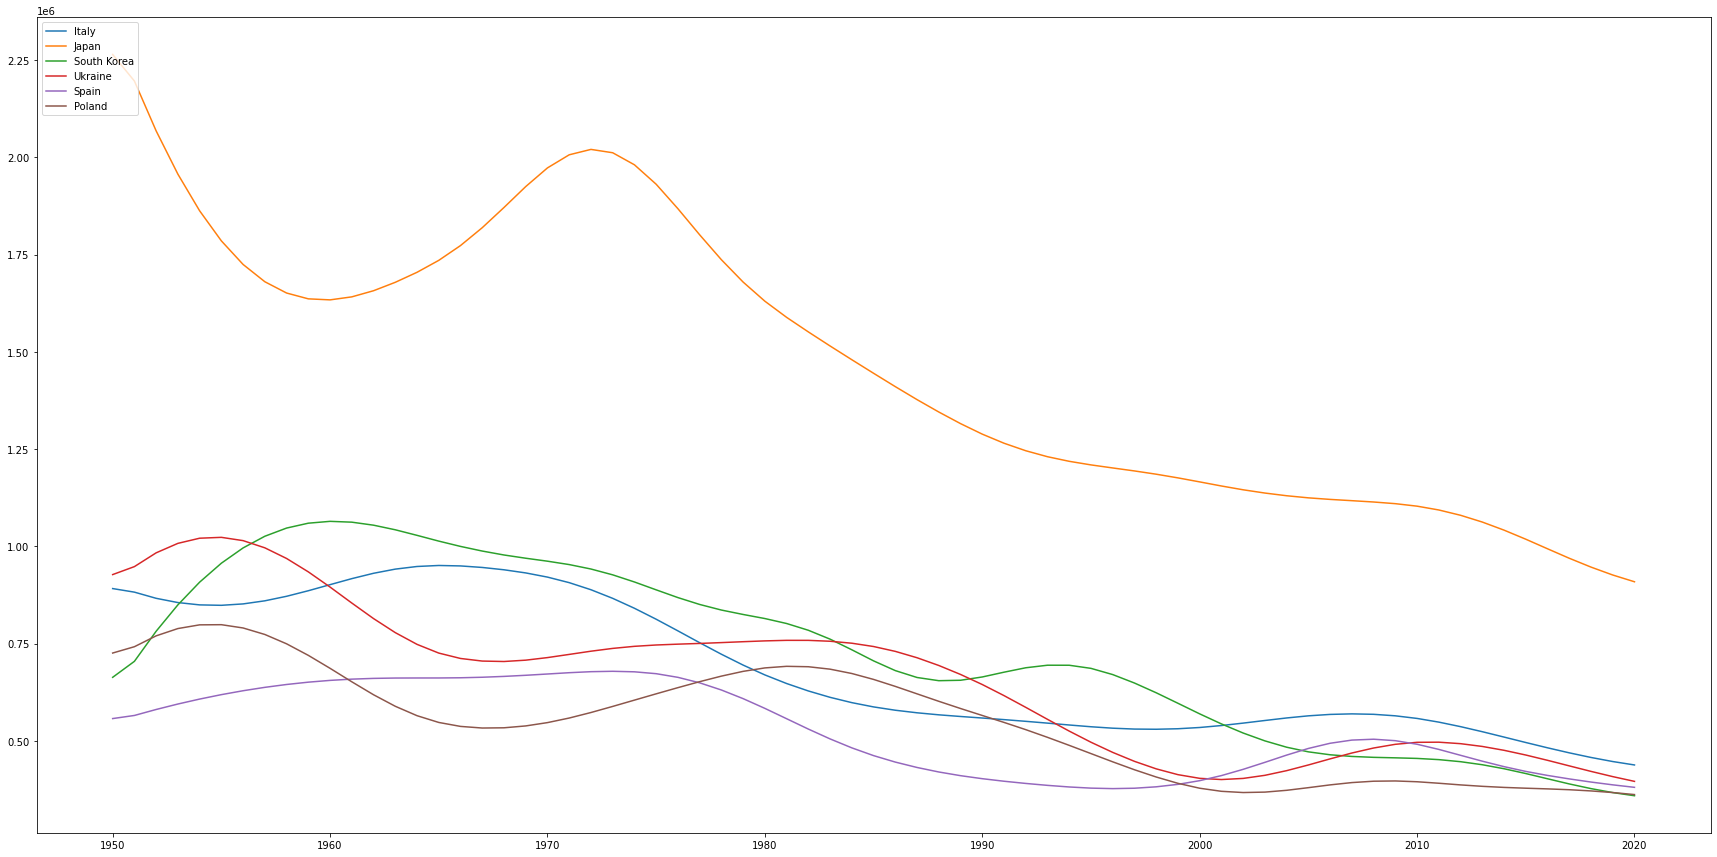

In [20]:
plt.figure(figsize=(30, 15))

# country_list = countries_with_highest_change['Country']
country_list = ['Italy', 'Japan', 'South Korea', 'Ukraine', 'Spain', 'Poland']

for country in country_list:
    plt.plot(birth_dic[country]['years'], birth_dic[country]['births'], label=country)
plt.legend(loc=2)

# Grouping by continent

In [21]:
continent_dict = {}

for continent in countries_continents['Continent'].unique():

    dfs = []

    current_population = 0
    future_population = 0

    for country in countries:
        continent_of_country = countries_continents[countries_continents['Country'] == country]['Continent'].iloc[0]

        if continent_of_country == continent:

            df = calc_future_population(country)
            dfs.append(df)

            current_population += df['Current Population'].iloc[0]
            future_population += df['Future Population'].iloc[0]

    countries_df = pd.concat(dfs)
    continent_dict[continent] = {'df': countries_df, 'current_pop': current_population, 'future_pop': future_population}  # countries_df

In [22]:
def get_data_per_continent(continent):
    change = calc_change(continent_dict[continent]['current_pop'], continent_dict[continent]['future_pop'])

    print('Current Population: ', f"{continent_dict[continent]['current_pop']:.2f}")
    print('Future Population:  ', f"{continent_dict[continent]['future_pop']:.2f}")
    print('Absolute Difference:', f"{abs(continent_dict[continent]['future_pop'] - continent_dict[continent]['current_pop']):.2f}")
    print('Change in Percent:  ', f"{change*100:.2f}%")

    return continent_dict[continent]['df']

## Europe

In [23]:
get_data_per_continent('Europe')

Current Population:  608964303.00
Future Population:   478528174.32
Absolute Difference: 130436128.68
Change in Percent:   -21.42%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
142,Albania,"2,872,933.00","2,625,988.23",-8.60,"33,421.00",78.57,1.60,2.19,2.39,2019,2097,Europe
141,Armenia,"2,968,127.00","3,026,006.10",1.95,"40,300.00",75.09,1.76,1.96,1.92,2019,2094,Europe
98,Austria,"9,043,070.00","7,285,437.85",-19.44,"89,072.00",81.79,1.54,2.48,3.08,2019,2100,Europe
89,Azerbaijan,"10,223,342.00","11,822,210.68",15.64,"161,937.00",73.00,2.06,1.73,1.50,2019,2092,Europe
96,Belarus,"9,442,862.00","8,148,547.09",-13.71,"109,779.00",74.23,1.72,2.32,2.69,2019,2093,Europe
82,Belgium,"11,632,326.00","10,157,963.88",-12.67,"124,262.00",81.75,1.72,2.29,2.62,2019,2100,Europe
137,Bosnia and Herzegovina,"3,263,466.00","2,036,497.71",-37.60,"26,311.00",77.40,1.25,3.20,5.14,2019,2096,Europe
108,Bulgaria,"6,896,663.00","4,636,616.54",-32.77,"61,892.00",74.91,1.57,2.97,4.42,2019,2093,Europe
131,Croatia,"4,081,651.00","2,829,081.45",-30.69,"36,074.00",78.42,1.43,2.89,4.16,2019,2097,Europe
161,Cyprus,"1,215,584.00","993,244.23",-18.29,"12,265.00",80.98,1.32,2.45,3.00,2019,2099,Europe


## North America

In [24]:
get_data_per_continent('North America')

Current Population:  594914497.00
Future Population:   634242385.94
Absolute Difference: 39327888.94
Change in Percent:   6.61%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
195,Antigua and Barbuda,"98,731.00","112,982.47",14.43,"1,467.00",77.02,1.99,1.75,1.53,2019,2096,North America
179,Bahamas,"396,913.00","399,748.54",0.71,"5,408.00",73.92,1.74,1.99,1.97,2019,2092,North America
185,Barbados,"287,711.00","241,371.12",-16.11,"3,048.00",79.19,1.62,2.38,2.84,2019,2098,North America
178,Belize,"404,914.00","598,028.72",47.69,"8,014.00",74.62,2.27,1.35,0.92,2019,2093,North America
38,Canada,"38,067,903.00","31,708,899.90",-16.70,"386,464.00",82.05,1.51,2.40,2.88,2019,2101,North America
124,Costa Rica,"5,139,052.00","5,543,987.46",7.88,"69,059.00",80.28,1.74,1.85,1.72,2019,2099,North America
84,Cuba,"11,317,505.00","8,889,732.42",-21.45,"112,811.00",78.80,1.60,2.55,3.24,2019,2097,North America
85,Dominican Republic,"10,953,703.00","15,260,537.84",39.32,"205,998.00",74.08,2.32,1.44,1.03,2019,2093,North America
112,El Salvador,"6,518,499.00","8,543,043.47",31.06,"116,522.00",73.32,2.02,1.53,1.16,2019,2092,North America
192,Grenada,"113,021.00","131,255.76",16.13,"1,813.00",72.40,2.04,1.72,1.48,2019,2091,North America


## South America

In [25]:
get_data_per_continent('South America')

Current Population:  433950170.00
Future Population:   493086598.98
Absolute Difference: 59136428.98
Change in Percent:   13.63%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
32,Argentina,"45,605,826.00","57,775,944.53",26.69,"753,596.00",76.67,2.25,1.58,1.25,2019,2095,South America
80,Bolivia,"11,832,940.00","17,674,080.39",49.36,"247,145.00",71.51,2.69,1.34,0.90,2019,2090,South America
6,Brazil,"213,993,437.00","219,290,323.04",2.48,"2,889,924.00",75.88,1.72,1.95,1.90,2019,2094,South America
64,Chile,"19,212,361.00","18,363,934.61",-4.42,"229,031.00",80.18,1.63,2.09,2.19,2019,2099,South America
28,Colombia,"51,265,844.00","56,610,640.75",10.43,"732,473.00",77.29,1.79,1.81,1.64,2019,2096,South America
68,Ecuador,"17,888,475.00","25,962,458.31",45.14,"337,131.00",77.01,2.40,1.38,0.95,2019,2096,South America
167,Guyana,"790,326.00","1,079,069.02",36.53,"15,436.00",69.91,2.44,1.46,1.07,2019,2088,South America
106,Paraguay,"7,219,638.00","10,640,895.22",47.39,"143,304.00",74.25,2.40,1.36,0.92,2019,2093,South America
44,Peru,"33,359,418.00","44,097,263.23",32.19,"574,662.00",76.74,2.23,1.51,1.14,2019,2095,South America
173,Suriname,"591,800.00","762,194.71",28.79,"10,633.00",71.68,2.39,1.55,1.21,2019,2090,South America


## Asia

In [26]:
get_data_per_continent('Asia')

Current Population:  4781328538.00
Future Population:   5432163687.73
Absolute Difference: 650835149.73
Change in Percent:   13.61%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
37,Afghanistan,"39,835,428.00","78,545,763.00",97.18,"1,211,509.00",64.83,4.32,1.01,0.51,2019,2083,Asia
155,Bahrain,"1,748,296.00","1,701,119.63",-2.70,"22,009.00",77.29,1.96,2.06,2.11,2019,2096,Asia
7,Bangladesh,"166,303,498.00","211,488,797.13",27.17,"2,913,430.00",72.59,2.01,1.57,1.24,2019,2091,Asia
168,Bhutan,"779,898.00","931,450.13",19.43,"12,977.00",71.78,1.95,1.67,1.40,2019,2090,Asia
176,Brunei,"441,532.00","474,883.60",7.55,"6,260.00",75.86,1.82,1.86,1.73,2019,2094,Asia
72,Cambodia,"16,946,438.00","25,329,061.30",49.47,"362,761.00",69.82,2.48,1.34,0.90,2019,2088,Asia
0,China,"1,444,216,107.00","1,272,065,103.94",-11.92,"16,539,228.00",76.91,1.70,2.27,2.58,2019,2095,Asia
104,Hong Kong,"7,552,810.00","7,020,470.43",-7.05,"82,518.00",85.08,1.36,2.15,2.31,2019,2104,Asia
1,India,"1,393,409,038.00","1,679,825,698.09",20.56,"24,116,023.00",69.66,2.20,1.66,1.38,2019,2088,Asia
3,Indonesia,"276,361,783.00","344,286,786.05",24.58,"4,800,697.00",71.72,2.29,1.61,1.29,2019,2090,Asia


## Oceania

In [27]:
get_data_per_continent('Oceania')

Current Population:  42117535.00
Future Population:   50655508.92
Absolute Difference: 8537973.92
Change in Percent:   20.27%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
55,Australia,"25,788,215.00","26,415,587.60",2.43,"318,644.00",82.90,1.81,1.95,1.91,2019,2101,Oceania
164,Fiji,"902,906.00","1,258,842.26",39.42,"18,665.00",67.44,2.75,1.43,1.03,2019,2086,Oceania
190,Kiribati,"121,392.00","221,310.45",82.31,"3,237.00",68.37,3.53,1.10,0.60,2019,2087,Oceania
128,New Zealand,"4,860,643.00","4,873,514.63",0.26,"59,646.00",81.71,1.88,1.99,1.99,2019,2100,Oceania
97,Papua New Guinea,"9,119,010.00","15,179,987.85",66.47,"235,345.00",64.50,3.52,1.20,0.72,2019,2083,Oceania
188,Samoa,"200,149.00","350,034.45",74.89,"4,774.00",73.32,3.83,1.14,0.65,2019,2092,Oceania
169,Solomon Islands,"703,996.00","1,561,749.42",121.84,"21,395.00",73.00,4.36,0.90,0.41,2019,2091,Oceania
194,Tonga,"106,760.00","177,834.76",66.57,"2,508.00",70.91,3.52,1.20,0.72,2019,2089,Oceania
183,Vanuatu,"314,464.00","616,647.50",96.09,"8,750.00",70.47,3.74,1.02,0.52,2019,2089,Oceania


## Africa

In [28]:
get_data_per_continent('Africa')

Current Population:  1246598717.00
Future Population:   2426036561.54
Absolute Difference: 1179437844.54
Change in Percent:   94.61%


,Country,Current Population,Future Population,Change in %,Births,Life Expectancy,Birth rate now,Birth rate to restore,Birth rate to restore after 2 epochs,Data from year,Prediction year,Continent
34,Algeria,"44,616,624.00","77,817,013.44",74.41,"1,012,188.00",76.88,2.99,1.15,0.66,2019,2095,Africa
42,Angola,"33,933,610.00","78,481,440.74",131.28,"1,283,488.00",61.15,5.44,0.86,0.37,2019,2080,Africa
77,Benin,"12,451,040.00","26,159,894.96",110.10,"423,498.00",61.77,4.77,0.95,0.45,2019,2080,Africa
147,Botswana,"2,397,241.00","3,880,241.14",61.86,"55,757.00",69.59,2.84,1.24,0.76,2019,2088,Africa
58,Burkina Faso,"21,497,096.00","46,952,277.77",118.41,"762,497.00",61.58,5.11,0.92,0.42,2019,2080,Africa
78,Burundi,"12,255,433.00","27,289,902.67",122.68,"443,133.00",61.58,5.32,0.90,0.40,2019,2080,Africa
52,Cameroon,"27,224,265.00","53,595,817.56",96.87,"903,930.00",59.29,4.51,1.02,0.52,2019,2078,Africa
174,Cape Verde,"561,898.00","764,694.92",36.09,"10,478.00",72.98,2.24,1.47,1.08,2019,2091,Africa
126,Central African Republic,"4,919,981.00","8,918,774.96",81.28,"167,385.00",53.28,4.64,1.10,0.61,2019,2072,Africa
70,Chad,"16,914,985.00","36,110,373.60",113.48,"665,764.00",54.24,5.65,0.94,0.44,2019,2073,Africa


# Insights

Obviously, Africa and Europe ...